In [72]:
from IPython.display import HTML

HTML(f"Dataset from <a href='https://forms.gle/wWKdyv1A6PHVVqWU7'>that</a> poll")

In [73]:
import pandas as pd; pd.options.mode.chained_assignment = None
import seaborn as sns; sns.set_style("white")
import matplotlib.pyplot as plt; plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

df = pd.read_csv('Какой ты смешарик.csv', names=["time", "salary", "smesharik", "series", "probability", "text"], header=1)
df = df[df["series"] < 200]
df.head(5)

,time,salary,smesharik,series,probability,text
0,2019/09/24 7:52:21 PM GMT+3,0.0,Совунья,9,0.00000,да
1,2019/09/24 7:54:57 PM GMT+3,0.0,Копатыч,0,0.15000,укуси меня пчела
2,2019/09/24 7:56:23 PM GMT+3,40.0,Копатыч,0,0.50000,yare yare daze
3,2019/09/24 7:57:33 PM GMT+3,300.0,Пин,48,0.38855,Твоя вайфу мусор
4,2019/09/24 7:58:05 PM GMT+3,7120.0,Ежик,100,0.25000,а что делать если серий 154


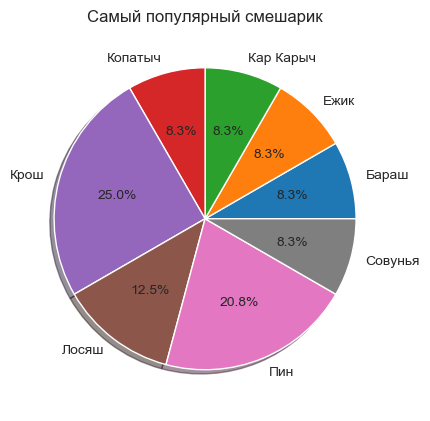

In [74]:
col = df["smesharik"]
data = col.groupby(col).agg("count")
plt.pie(data.values, autopct='%1.1f%%', labels=data.index, shadow=True)
plt.title("Самый популярный смешарик")
plt.show()

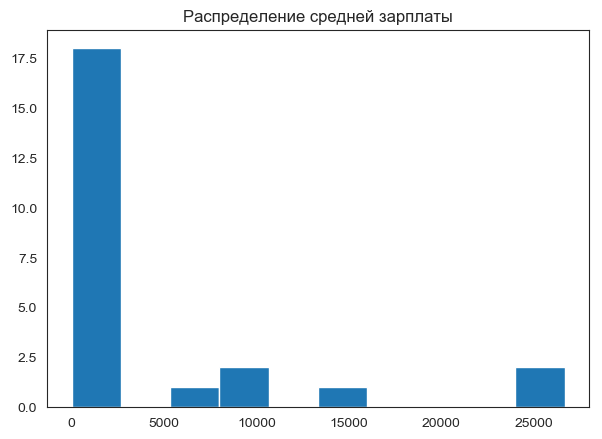

In [75]:
data = df["salary"]
plt.hist(data.values)
plt.title("Распределение средней зарплаты")
plt.show()

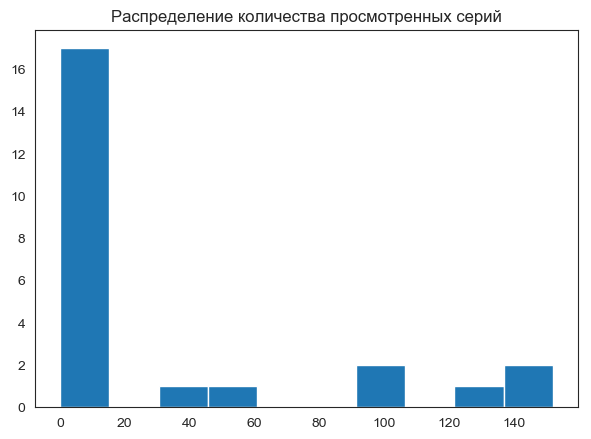

In [76]:
data = df["series"]
plt.hist(data.values)
plt.title("Распределение количества просмотренных серий")
plt.show()

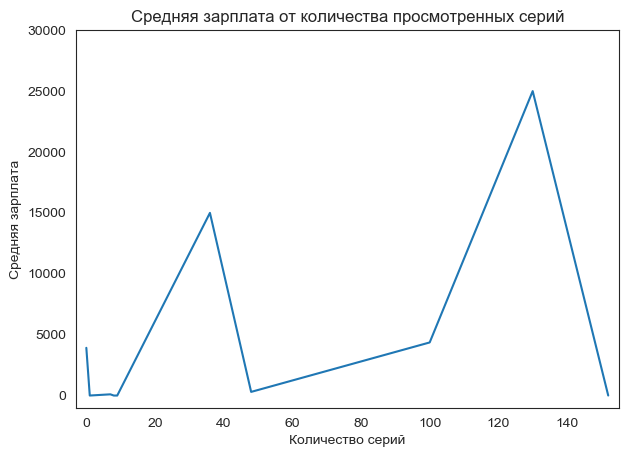

In [77]:
data = df[["series", "salary"]].groupby(df["series"]).agg("mean")
plt.plot(data["series"], data["salary"])
plt.gca().set(title="Средняя зарплата от количества просмотренных серий", xlabel="Количество серий", ylabel="Средняя зарплата")
plt.xlim(-3, 155)
plt.ylim(-1000, 30000)
plt.show()

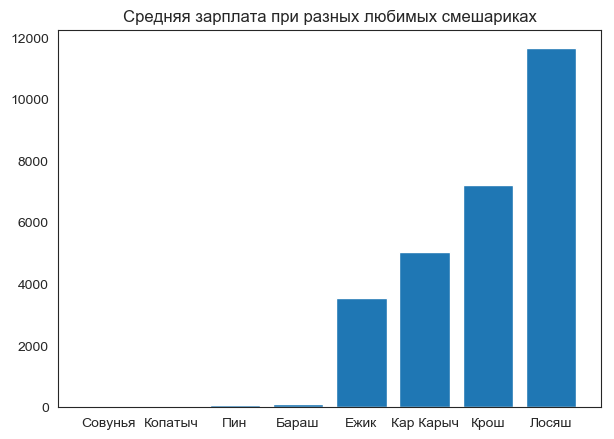

In [78]:
data = df[["smesharik", "salary"]].groupby(df["smesharik"]).agg("mean").sort_values("salary")
plt.bar(data.index, data.values.T[0])
plt.title("Средняя зарплата при разных любимых смешариках")
plt.show()

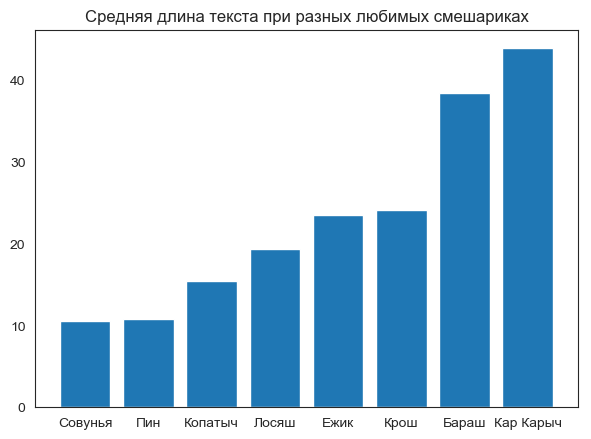

In [79]:
data = df[["smesharik", "text"]]
data["text"] = data["text"].map(lambda s: len(s))
data = data[data["text"] < 1000]
data = data.groupby(df["smesharik"]).agg("mean").sort_values("text")

plt.bar(data.index, data.values.T[0])
plt.title("Средняя длина текста при разных любимых смешариках")
plt.show()